# Titanic - Machine Learning from Disaster 

- Daniel Betzalel
- https://www.kaggle.com/danielbetzalel
- Shai Odeni
- https://www.kaggle.com/shaiodeni

## TL;DR
The assignment was to predict the survivors on the Titanic ship according to the given features. We separated the work into 6 parts:

1. **Imports and Definitions** - Importing necessary libraries and setting up global settings.
2. **Data Investigation EDA** - Exploring and understanding the dataset using statistical analysis and visualization.
3. **Data Cleaning and Preprocessing** - Handling missing values, outliers, and encoding categorical variables.
4. **Feature Selection** - Choosing the most relevant features for the model.
5. **Model Selection and Training** - Choosing, training, and tuning a machine learning model.
6. **Tests Model** - Evaluating the model's performance on a test set.




## Part 1 Imports and Definitions


In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection


# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20


- define the input and output folders


In [2]:
input_folder = "input/"

train_data_path = os.path.join(input_folder, "train.csv")
test_data_path = os.path.join(input_folder, "test.csv")

#### Load the traning data


- Load the csv data to variables

In [3]:
train_data = pd.read_csv(train_data_path)

test_data = pd.read_csv(test_data_path)


## Part 2 Data Investigation EDA


The columns that we will drop are:
- PassengerId: it is just an index
- Name: it is not relevant for the model
- Ticket: it is not relevant for the model

In [4]:
from sklearn.preprocessing import LabelEncoder

DROP_DATA = ["PassengerId", "Name", "Ticket"]
def remove_Unused_Columns(data):
    data = data.drop(DROP_DATA, axis=1)
    return data


le = LabelEncoder()
def convet_gender_to_numric(df):
    """   
    "sex" column ===> male = 1, female = 0
    """
    df['Sex'] = le.fit_transform(df['Sex'])

In [5]:
train_data = remove_Unused_Columns(train_data)

# passenger_ids save the passenger ids for the test data for the submission
passenger_ids = test_data['PassengerId']
test_data = remove_Unused_Columns(test_data)


In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


- Convert Men/Women to 1/0

In [7]:
convet_gender_to_numric(train_data)

convet_gender_to_numric(test_data)

In [8]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


Get summary statistics for the training dataset show only the numerical columns


In [9]:
train_data.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Get the number of missing values in the training dataset


In [10]:
display(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The dataset contains missing values in the following columns:

1) Age: 177 missing values
2) Cabin: 687 missing values (cabin has a lot of missing values)
3) Embarked: 2 missing values




- Get the data types of the columns in the training dataset


In [11]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


None

- We can see that most of the data is int64 or float64, only the Cabin and Embarked Are object types (String)

### Display the features


In [12]:
def plot_and_calculate(df, column):
    # Plot the survival rate
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Survived', data=df)
    plt.title(f'Survival Rate by {column}')
    plt.show()

    # Group by column and 'Survived', then get the size of each group
    grouped = df.groupby([column, 'Survived']).size()

    # Calculate the percentage of survivors
    percentage_survived = grouped.xs(1, level='Survived') / grouped.groupby(level=column).sum() * 100

    # Print the percentage of survivors
    print(f"Percentage of survivors for each {column}:")
    print(percentage_survived)

- In this section, we will explore the relationship between the survival rate and some of the features in the dataset.
- After each graph, we will print the percentage of survivors for each category in the feature.

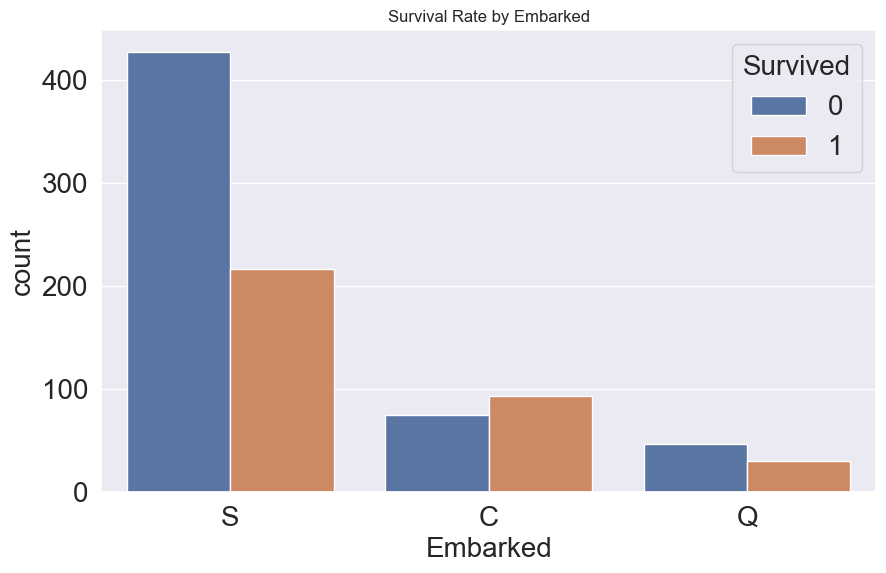

Percentage of survivors for each Embarked:
Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64


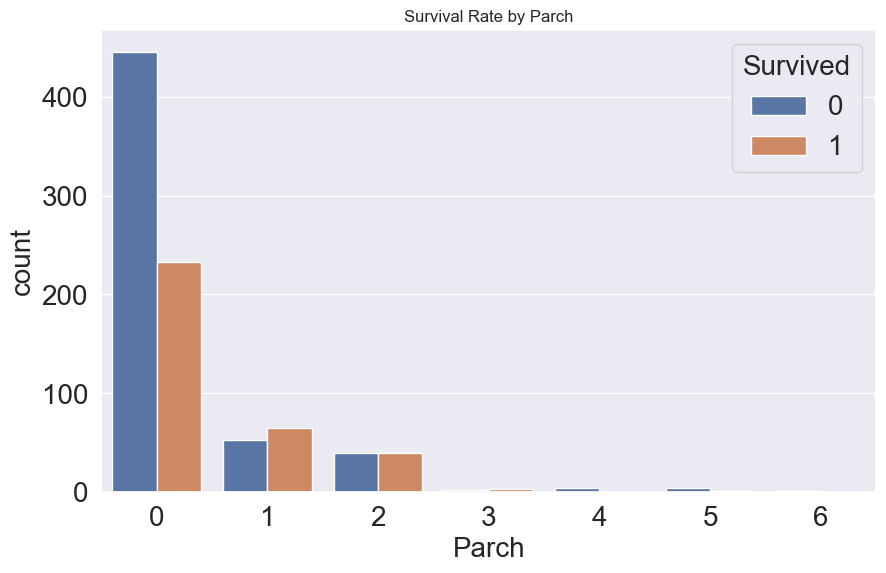

Percentage of survivors for each Parch:
Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4          NaN
5    20.000000
6          NaN
dtype: float64


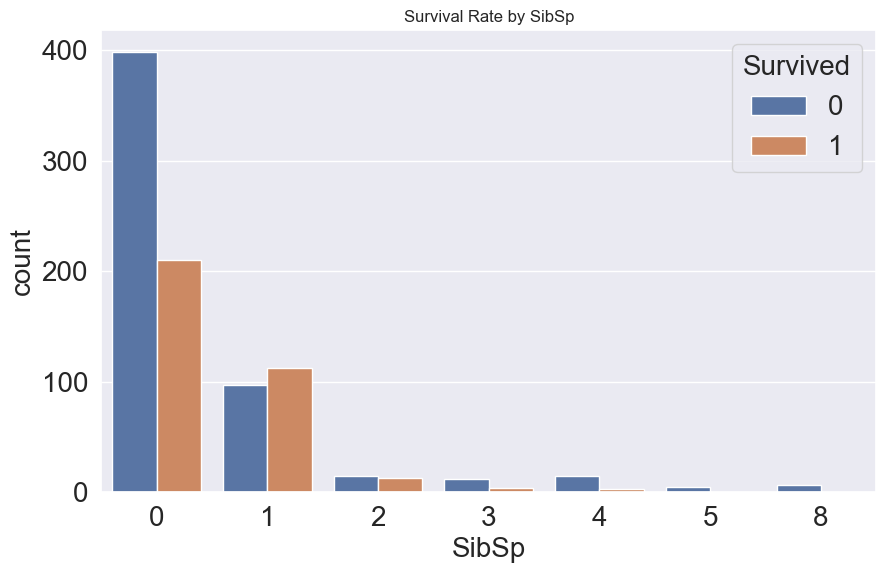

Percentage of survivors for each SibSp:
SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5          NaN
8          NaN
dtype: float64


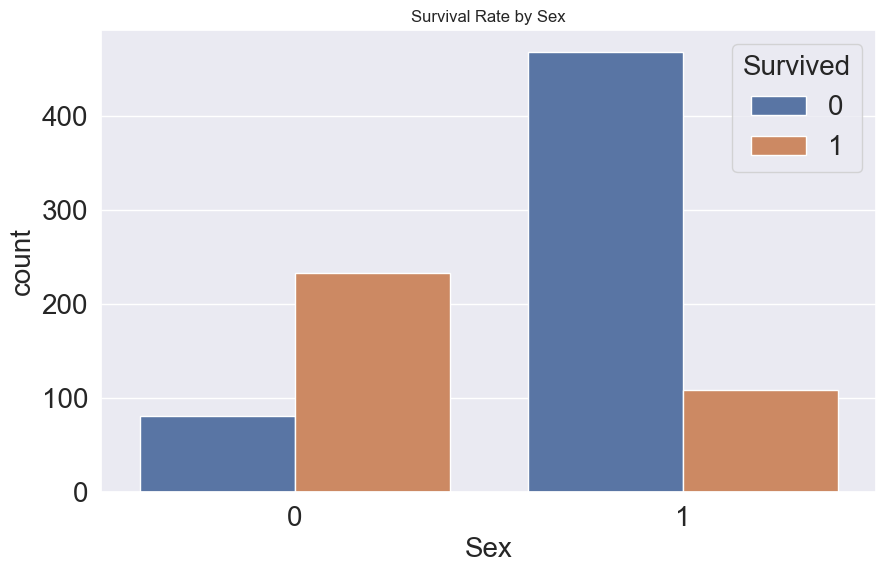

Percentage of survivors for each Sex:
Sex
0    74.203822
1    18.890815
dtype: float64


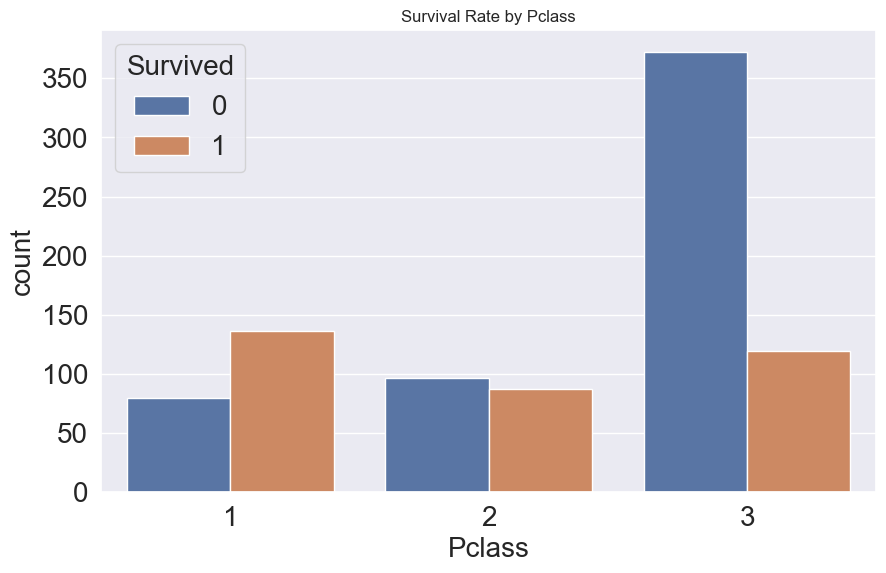

Percentage of survivors for each Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


In [13]:
plot_and_calculate(train_data, 'Embarked')
plot_and_calculate(train_data, 'Parch')
plot_and_calculate(train_data, 'SibSp')
plot_and_calculate(train_data, 'Sex')
plot_and_calculate(train_data, 'Pclass')


Now we can study from this graph
1) From port C more people survived but from S and Q most of the people died
2) Most women survived (74%)
3) Most people from Pclass 1 survived (63%) but most people from Pclass 3 died (76% died)

**Pairplot Visualizing Correlation**

- Now we will display the pairplot of the data we can see the correlation between the features

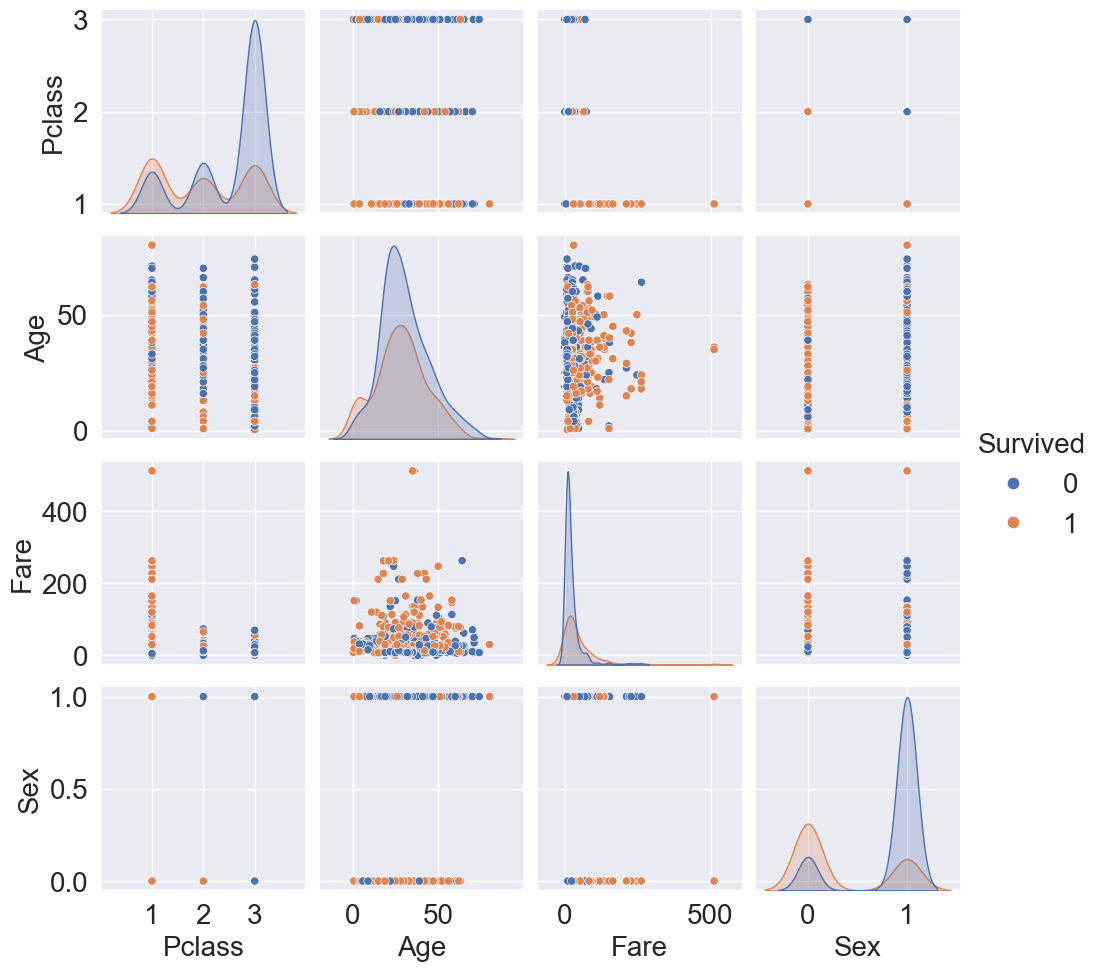

In [14]:
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived')
plt.show()

**Heatmap for correlation matrix**


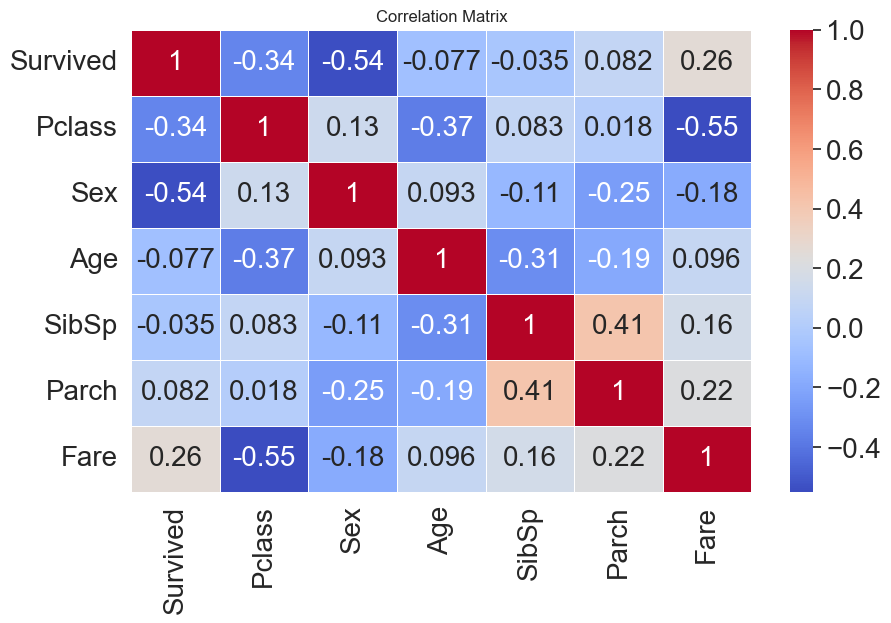

In [15]:
plt.figure(figsize=(10, 6))
corr_matrix = train_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- We can see that the correlation between the Survived and features like Pclass, Fare are high.


## Part 3 Data Cleaning and Preprocessing

Check for missing values in the train dataset


In [16]:
print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Fill Missing Values
- Categorical columns with the most frequent value 
- Numerical columns with the mean
- Drop the Cabin column due to too many missing value

In [17]:
from sklearn.impute import SimpleImputer

# fill missing values, the 


def fill_missing_values(data):
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data = handle_missing_values(data)
    return data


def drop_missing_values(data):
    data.drop(columns=['Cabin'], inplace=True)
    return data


def handle_missing_values(data):    
    # Impute numerical columns with mean
    imputer_num = SimpleImputer(strategy='mean')
    data[data.select_dtypes(include=['number']).columns] = imputer_num.fit_transform(data.select_dtypes(include=['number']))
    
    # Impute categorical columns with constant value 'missing'
    imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
    data[data.select_dtypes(exclude=['number']).columns] = imputer_cat.fit_transform(data.select_dtypes(exclude=['number']))
    
    return data



In [18]:
#there's only two people with NaN, after searching about them it was find out they board in Southampton 
train_data["Embarked"] = train_data.loc[:, 'Embarked'].fillna('S')

train_data = drop_missing_values(train_data)
train_data = fill_missing_values(train_data)

# test data
test_data = drop_missing_values(test_data)
test_data = fill_missing_values(test_data)


In [19]:
print(train_data.isnull().sum())

print(test_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Convert Categorical Variables into Numerical Values
- Embarked use One-hot encode

In [20]:
def encode_categorical(data):
    # One-hot encode the categorical columns
    data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
    return data

In [21]:
train_data = encode_categorical(train_data)

test_data = encode_categorical(test_data)


In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,False,True
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,False,False
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,False,True
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,False,True
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,False,True


In [23]:
print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


Standardize Numerical Features
- Standardize Age and Fare to have a mean of 0 and a standard deviation of 1.

In [24]:
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    # Initialize the scaler
    scaler = StandardScaler()
    data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
    
    return data

In [25]:
train_data = scale_data(train_data)

test_data = scale_data(test_data)


In [26]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,-0.592481,1.0,0.0,-0.502445,False,True
1,1.0,1.0,0.0,0.638789,1.0,0.0,0.786845,False,False
2,1.0,3.0,0.0,-0.284663,0.0,0.0,-0.488854,False,True
3,1.0,1.0,0.0,0.407926,1.0,0.0,0.420730,False,True
4,0.0,3.0,1.0,0.407926,0.0,0.0,-0.486337,False,True


### Create New Features
 - Family Size from SibSp and Parch
 - Is Alone from the FamilySize
 - Remove SibSp and Parch columns becuse of the new features

In [27]:
def create_features(data):
    """
    Create new features for the dataset.
    """
    # Create FamilySize feature 
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Create IsAlone feature
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
    
    return data

def drop_features(data):
    data.drop(columns=['SibSp', 'Parch'], inplace=True)
    return data
    

In [28]:
# train data
train_data = create_features(train_data)
train_data = drop_features(train_data)
# test data
test_data = create_features(test_data)
test_data = drop_features(test_data)


In [29]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0.0,3.0,1.0,-0.592481,-0.502445,False,True,2.0,0
1,1.0,1.0,0.0,0.638789,0.786845,False,False,2.0,0
2,1.0,3.0,0.0,-0.284663,-0.488854,False,True,1.0,1
3,1.0,1.0,0.0,0.407926,0.420730,False,True,2.0,0
4,0.0,3.0,1.0,0.407926,-0.486337,False,True,1.0,1


Final Dataset

In [30]:
print(train_data.head())

print("\n\nmissing values in train data:\n")
print(train_data.isnull().sum())


   Survived  Pclass  Sex       Age      Fare  Embarked_Q  Embarked_S  \
0       0.0     3.0  1.0 -0.592481 -0.502445       False        True   
1       1.0     1.0  0.0  0.638789  0.786845       False       False   
2       1.0     3.0  0.0 -0.284663 -0.488854       False        True   
3       1.0     1.0  0.0  0.407926  0.420730       False        True   
4       0.0     3.0  1.0  0.407926 -0.486337       False        True   

   FamilySize  IsAlone  
0         2.0        0  
1         2.0        0  
2         1.0        1  
3         2.0        0  
4         1.0        1  


missing values in train data:

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
dtype: int64


## Part 4 Feature Selection

- Now we will search for the strongest features that affect the survival rate

Correlation matrix


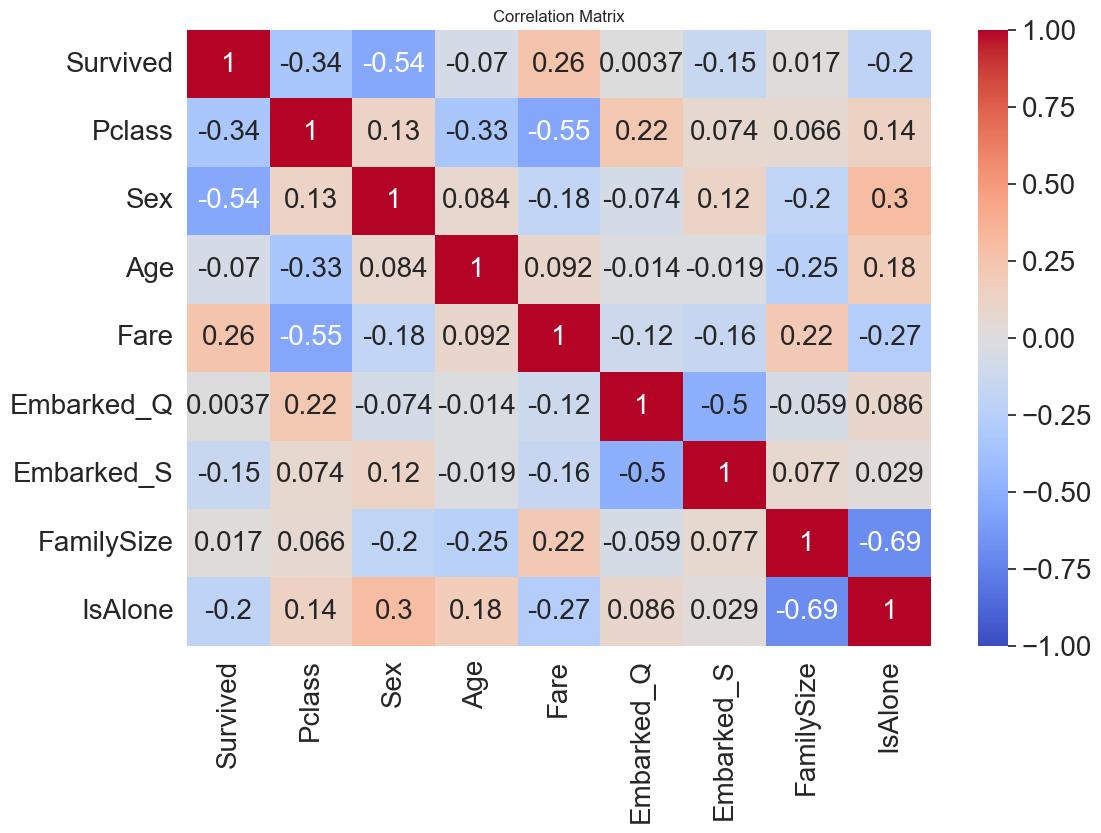

In [31]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Feature Selection using Logistic Regression Coefficients
- We will use logistic regression to see the coefficients of the features and their importance, then we will be able to select the most important features.

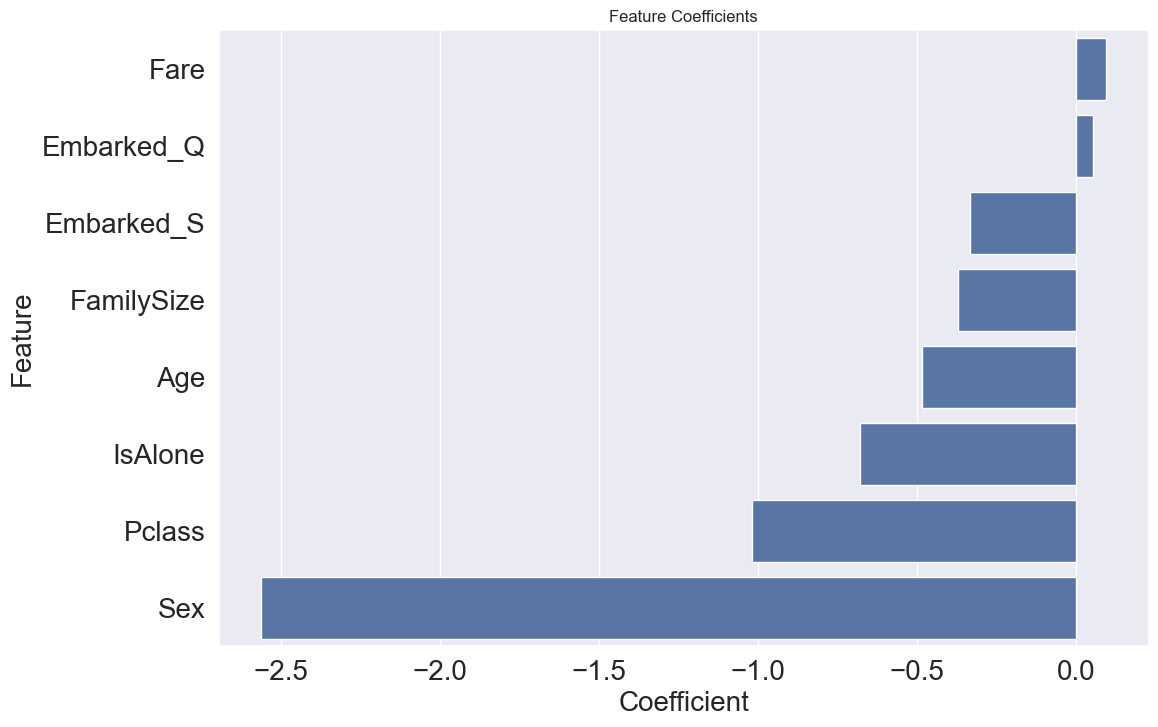

In [32]:
from sklearn.linear_model import LogisticRegression

# Select features and target
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

# Encode categorical variables
X = pd.get_dummies(X)

# Initialize and fit Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)

# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients')
plt.show()


Remove low coefficient data
- In this part we will remove the features that have a coefficient close to zero
- we can see that Fare feature has very low coefficient, so we can drop it


In [33]:
def drop_features_based_on_coefficients(data):
    # Get features with coefficients above the threshold
    drop_features = ['Fare', 'Embarked_Q', 'Embarked_S', "FamilySize"]
    

    data.drop(columns=drop_features, inplace=True)
    
    return data

In [34]:
train_data = drop_features_based_on_coefficients(train_data)
test_data = drop_features_based_on_coefficients(test_data)

In [35]:
print(train_data.head())

print("\n\nmissing values in train data:\n")
print(train_data.isnull().sum())


   Survived  Pclass  Sex       Age  IsAlone
0       0.0     3.0  1.0 -0.592481        0
1       1.0     1.0  0.0  0.638789        0
2       1.0     3.0  0.0 -0.284663        1
3       1.0     1.0  0.0  0.407926        0
4       0.0     3.0  1.0  0.407926        1


missing values in train data:

Survived    0
Pclass      0
Sex         0
Age         0
IsAlone     0
dtype: int64


## Part 5 Model Selection and Training

In [36]:
train_data.head()


,Survived,Pclass,Sex,Age,IsAlone
0,0.0,3.0,1.0,-0.592481,0
1,1.0,1.0,0.0,0.638789,0
2,1.0,3.0,0.0,-0.284663,1
3,1.0,1.0,0.0,0.407926,0
4,0.0,3.0,1.0,0.407926,1


### Final train features:


In [37]:
train_features = train_data.drop(columns=['Survived'])

print(train_features.head())

   Pclass  Sex       Age  IsAlone
0     3.0  1.0 -0.592481        0
1     1.0  0.0  0.638789        0
2     3.0  0.0 -0.284663        1
3     1.0  0.0  0.407926        0
4     3.0  1.0  0.407926        1


Split the data:
- Train size = 0.7
- Validation size = 0.3

In [38]:
from sklearn.model_selection import train_test_split

# Select features and target
X = train_features
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the split datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)


Train set shape: (623, 4) (623,)
Validation set shape: (268, 4) (268,)


### Model Selection and Training
- Logistic Regression
- MLP
- SGDClassifier

In [39]:
# Initialize models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# logestic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# multi-layer perceptron model
mlp = MLPClassifier(max_iter=1000, random_state=42)  

# SGDClassifier model
sgd = SGDClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
mlp.fit(X_train, y_train)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

Print scores of the models on the validation set


In [40]:
# Evaluate models
log_reg_score = log_reg.score(X_validation, y_validation)
mlp_score = mlp.score(X_validation, y_validation)
sgd_score = sgd.score(X_validation, y_validation)

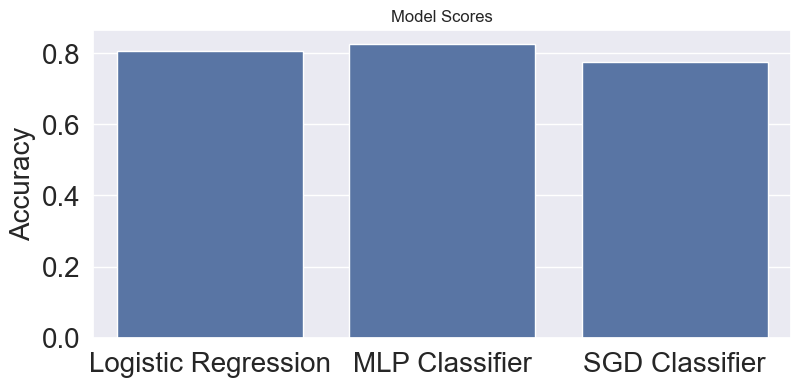

Logistic Regression Accuracy: 0.8059701492537313
MLP Classifier Accuracy: 0.8246268656716418
SGD Classifier Accuracy: 0.7761194029850746


In [41]:
#in this part we will display the graph of the results of the models
plt.figure(figsize=(9, 4))
models = ['Logistic Regression', 'MLP Classifier', 'SGD Classifier']
scores = [log_reg_score, mlp_score, sgd_score]
sns.barplot(x=models, y=scores)
plt.title('Model Scores')
plt.ylabel('Accuracy')
plt.show()

print("Logistic Regression Accuracy:", log_reg_score)
print("MLP Classifier Accuracy:", mlp_score)
print("SGD Classifier Accuracy:", sgd_score)

The best model is the MLP Classifier now we will show the validation loss with different hidden layers

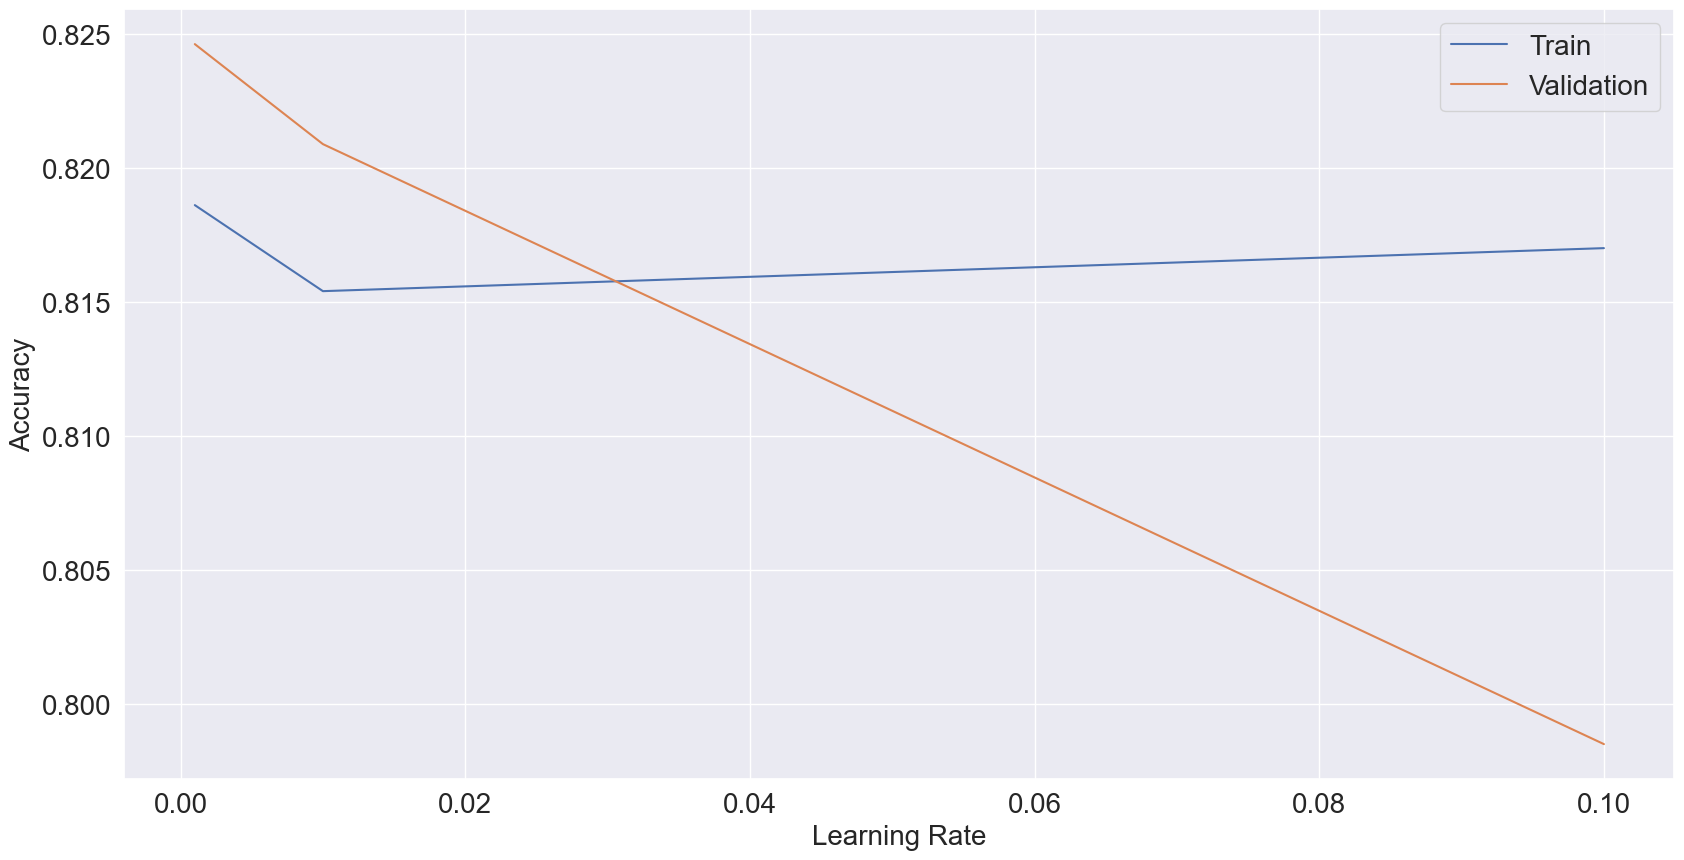

In [42]:
train_scores, val_scores = [], []
for lr in [0.001, 0.01, 0.1]:
    mlp = MLPClassifier(learning_rate_init=lr, max_iter=500, random_state=42)   
    mlp.fit(X_train, y_train)
    train_scores.append(mlp.score(X_train, y_train))  
    val_scores.append(mlp.score(X_validation, y_validation))
plt.plot([0.001, 0.01, 0.1], train_scores, label='Train')
plt.plot([0.001, 0.01, 0.1], val_scores, label='Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



The graph shows training and validation accuracies at different learning rates.<br>
The best learning rate is 0.01 (the convention is 0.001 for large datasets)<br>

In [43]:
# Select the best hyperparameters
mlp = MLPClassifier(learning_rate_init=0.01, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
mlp_score = mlp.score(X_validation, y_validation)
print("MLP Classifier Accuracy:", mlp_score)


MLP Classifier Accuracy: 0.8208955223880597


## Part 6 Tests Model

- Run the model on test data

In [44]:

predictions = mlp.predict(test_data).astype(int)



- Create sumbission file for the test data

In [45]:
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
submission_df.to_csv('submission.csv', index=False)



time = pd.Timestamp.now()
formatted_time = time.strftime('%H:%M:%S')
print(f"Your submission was successfully saved at time {formatted_time}")

Your submission was successfully saved at time 16:46:18


## TL;DR
We've tried 3 models (SGD, MLP, Logistic Regression). <br>The highest score was from the MLP model.
After the model selection, we made hyperparameters and chose the best of them. We also tried different learning rates.<br> We found out that 0.01 is the best one.
<br>We've dropped some of the features (name, ticket, cabin) and made some others to replace them in a more accurate way, such as familySize & isAlone.


## References:
Encyclopedia of the Titanic and its passengers:<br>
https://www.encyclopedia-titanica.org/

YouTube:<br>
To explain the structure of the ship, and the impact of the iceberg.